In [1]:
#Based on https://towardsdatascience.com/house-prices-prediction-using-deep-learning-dea265cc3154

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#import Data
Data = pd.read_csv("kc_house_data.csv")
Data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


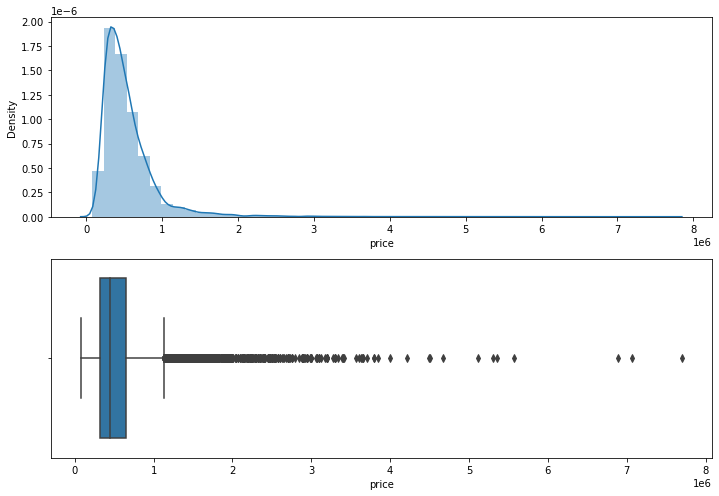

In [4]:
#visualizing house prices
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(Data['price'])
fig.add_subplot(2,1,2)
sns.boxplot(Data['price'])
plt.tight_layout()

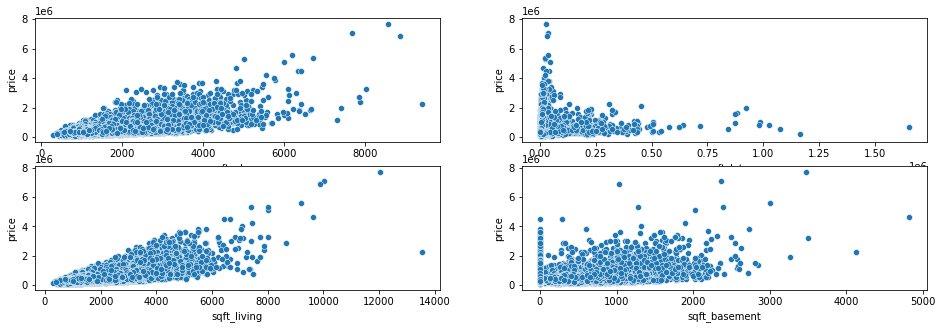

In [5]:
#visualizing square footage of (home,lot,above and basement)
fig = plt.figure(figsize=(16,5))
fig.add_subplot(2,2,1)
sns.scatterplot(Data['sqft_above'], Data['price'])
fig.add_subplot(2,2,2)
sns.scatterplot(Data['sqft_lot'],Data['price'])
fig.add_subplot(2,2,3)
sns.scatterplot(Data['sqft_living'],Data['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(Data['sqft_basement'],Data['price'])

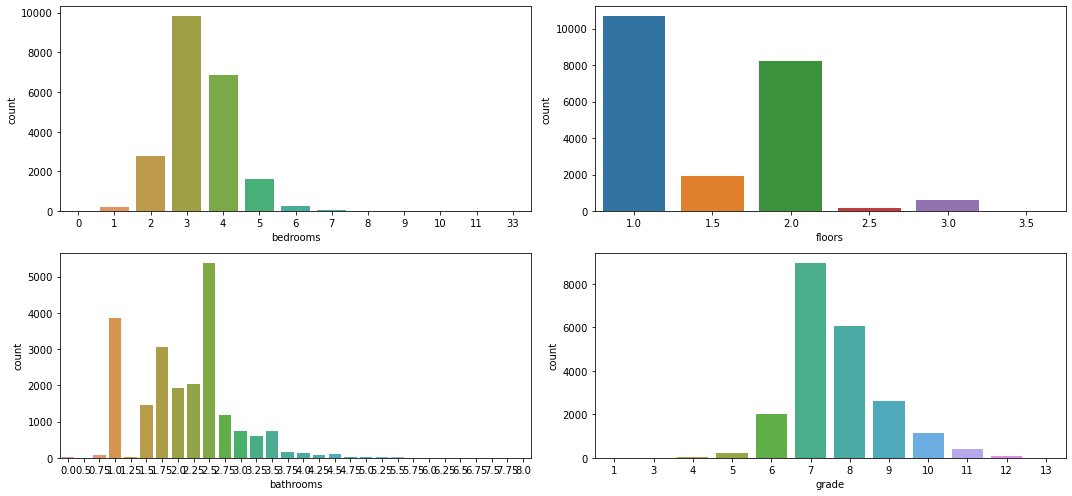

In [6]:
#visualizing bedrooms,bathrooms,floors,grade
fig = plt.figure(figsize=(15,7))
fig.add_subplot(2,2,1)
sns.countplot(Data['bedrooms'])
fig.add_subplot(2,2,2)
sns.countplot(Data['floors'])
fig.add_subplot(2,2,3)
sns.countplot(Data['bathrooms'])
fig.add_subplot(2,2,4)
sns.countplot(Data['grade'])
plt.tight_layout()

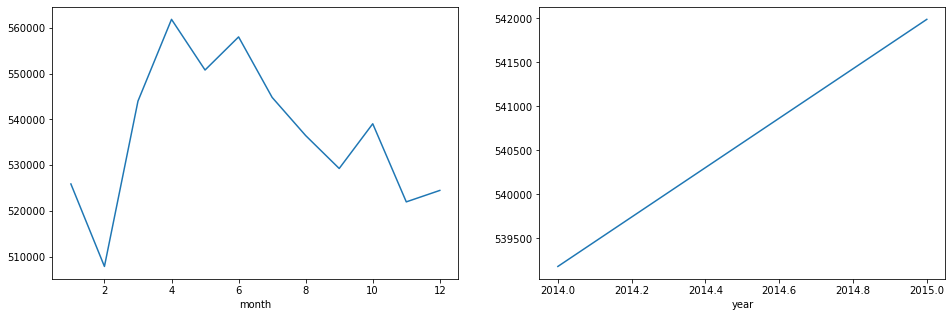

In [7]:
#let's break date to years, months
Data['date'] = pd.to_datetime(Data['date'])
Data['month'] = Data['date'].apply(lambda date:date.month)
Data['year'] = Data['date'].apply(lambda date:date.year)
#data visualization house price vs months and years
fig = plt.figure(figsize=(16,5))
fig.add_subplot(1,2,1)
Data.groupby('month').mean()['price'].plot()
fig.add_subplot(1,2,2)
Data.groupby('year').mean()['price'].plot()

In [8]:
# drop unnecessary columns
Data = Data.drop('date',axis=1)
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)
Data = Data.drop('bathrooms',axis=1)
Data = Data.drop('bedrooms',axis=1)
Data = Data.drop('floors',axis=1)
Data = Data.drop('waterfront',axis=1)

Data = Data.drop('view',axis=1)
Data = Data.drop('condition',axis=1)
Data = Data.drop('grade',axis=1)
Data = Data.drop('sqft_basement',axis=1)

Data = Data.drop('yr_built',axis=1)
Data = Data.drop('yr_renovated',axis=1)
Data = Data.drop('lat',axis=1)
Data = Data.drop('long',axis=1)
Data = Data.drop('sqft_living15',axis=1)
Data = Data.drop('sqft_lot15',axis=1)
Data = Data.drop('month',axis=1)
Data = Data.drop('year',axis=1)

In [9]:
Data.describe()

,price,sqft_living,sqft_lot,sqft_above
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000
mean,5.400881e+05,2079.899736,1.510697e+04,1788.390691
std,3.671272e+05,918.440897,4.142051e+04,828.090978
min,7.500000e+04,290.000000,5.200000e+02,290.000000
25%,3.219500e+05,1427.000000,5.040000e+03,1190.000000
50%,4.500000e+05,1910.000000,7.618000e+03,1560.000000
75%,6.450000e+05,2550.000000,1.068800e+04,2210.000000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000


In [10]:
# X = features to be used in prediction, y = output price
# use for X all features except price

X = Data.drop('price',axis =1).values
y = Data['price'].values

In [11]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [12]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [13]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

540068.0331491713
[265302.60601474  -9735.05254247 -10634.16494812]


,Coefficient
sqft_living,265302.606015
sqft_lot,-9735.052542
sqft_above,-10634.164948


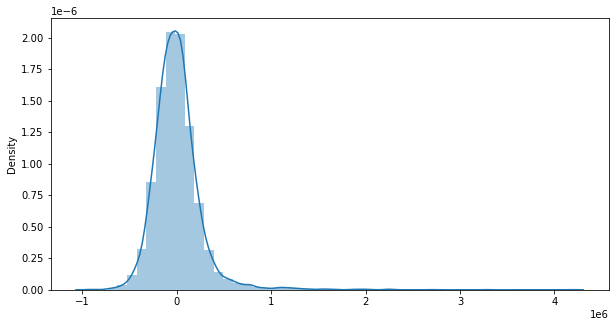

In [14]:
# visualizing residuals
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [15]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1

,Actual,Predicted
0,349950.0,253090.862231
1,450000.0,535017.199823
2,635000.0,655544.421387
3,355500.0,613180.042090
4,246950.0,425372.727612
5,406550.0,640617.103167
6,350000.0,390698.800195
7,226500.0,394308.380957
8,265000.0,353777.819311
9,656000.0,598075.106731


In [16]:
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 171975.60420930918
MSE: 66926324123.72379
RMSE: 258701.22559377988
VarScore: 0.5120177553603069


MAE: 171975.60420930918
MSE: 66926324123.72379
RMSE: 258701.22559377988
VarScore: 0.5120177553603069


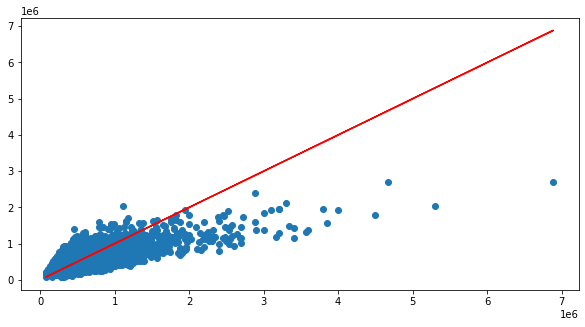

In [17]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

# Trial with full dataset

In [18]:
#import Data
Data = pd.read_csv("kc_house_data.csv")
Data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [19]:
# drop some unnecessary columns, keeping the rest
Data = Data.drop('date',axis=1)
Data = Data.drop('id',axis=1)
Data = Data.drop('zipcode',axis=1)

In [20]:
Data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


In [21]:
# X = features to be used in prediction, y = output price
# use for X all features except price

X = Data.drop('price',axis =1).values
y = Data['price'].values

In [22]:
#splitting Train and Test 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [23]:
#standardization scaler - fit&transform on train, fit only on test
from sklearn.preprocessing import StandardScaler
s_scaler = StandardScaler()
X_train = s_scaler.fit_transform(X_train.astype(np.float))
X_test = s_scaler.transform(X_test.astype(np.float))

In [24]:
# Multiple Liner Regression
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

#evaluate the model (intercept and slope)
print(regressor.intercept_)
print(regressor.coef_)
#predicting the test set result
y_pred = regressor.predict(X_test)
#put results as a DataFrame
coeff_df = pd.DataFrame(regressor.coef_, Data.drop('price',axis =1).columns, columns=['Coefficient']) 
coeff_df

540053.1359377638
[-3.16222529e+04  2.85529434e+04  8.43671729e+16  6.71792469e+03
  2.94056690e+03  4.99495724e+04  3.71215583e+04  2.09578578e+04
  1.15901666e+05 -7.62933401e+16 -4.04532293e+16 -7.31586292e+04
  7.19604984e+03  7.77263955e+04 -1.72466734e+04  1.87061274e+04
 -1.04672395e+04]


,Coefficient
bedrooms,-3.162225e+04
bathrooms,2.855294e+04
sqft_living,8.436717e+16
sqft_lot,6.717925e+03
floors,2.940567e+03
waterfront,4.994957e+04
view,3.712156e+04
condition,2.095786e+04
grade,1.159017e+05
sqft_above,-7.629334e+16


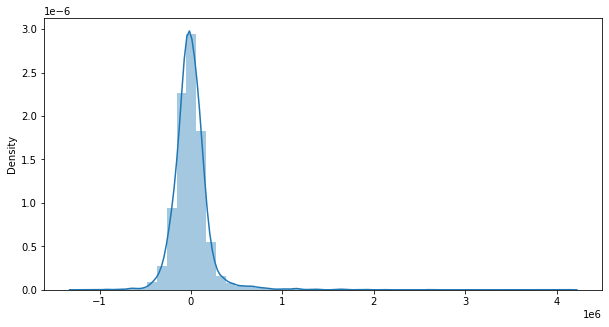

In [25]:
# visualizing residuals, checking residuals are normally distributed 
# (proof of having linear relationship with the dependent variable)
fig = plt.figure(figsize=(10,5))
residuals = (y_test- y_pred)
sns.distplot(residuals)

In [26]:
#compare actual output values with predicted values
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(10)
df1
# evaluate the performance of the algorithm (MAE - MSE - RMSE)
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))

MAE: 126541.630204506
MSE: 40825991991.83971
RMSE: 202054.42829059626
VarScore: 0.7023340649794015


MAE: 126541.630204506
MSE: 40825991991.83971
RMSE: 202054.42829059626
VarScore: 0.7023340649794015


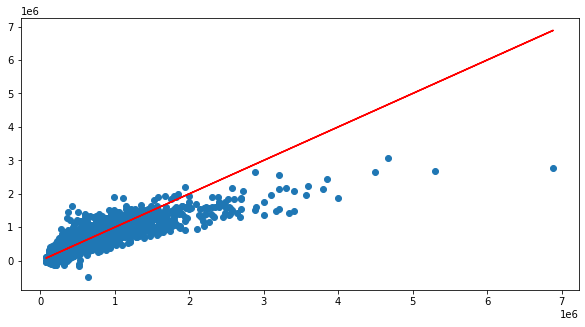

In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('VarScore:',metrics.explained_variance_score(y_test,y_pred))
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,y_pred)
# Perfect predictions
plt.plot(y_test,y_test,'r')

In [28]:
#There seems to be slight improvement in the loss by including all the features, but they are not as significant as initially thought. 

In [29]:
#Improvements to do: 

#outlier removal
#select features based on statistical significance